**Mini Project 2 - Students Performance by Melih Kurtaran**

In this project, the data collected from 9 week long online ML course which is hosted on the online learning management system Moodle will be used for developing ML algorithms.

In [12]:
#importing the necessary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
#load csv file
df_grades = pd.read_csv('MP2_Data.csv')
df_grades.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


# Part 1 – Data Processing

There is no need to keep ids for ML model, hence the id column is dropped.

In [14]:
df_grades.drop('ID', axis=1, inplace=True)

It will be checked if there any missing values or not

In [15]:
df_grades.isnull().any()

Week2_Quiz1    False
Week3_MP1      False
Week3_PR1      False
Week5_MP2      False
Week5_PR2      False
Week7_MP3      False
Week7_PR3      False
Week4_Quiz2    False
Week6_Quiz3    False
Week8_Total    False
Week1_Stat0    False
Week1_Stat1    False
Week1_Stat2    False
Week1_Stat3    False
Week2_Stat0    False
Week2_Stat1    False
Week2_Stat2    False
Week2_Stat3    False
Week3_Stat0    False
Week3_Stat1    False
Week3_Stat2    False
Week3_Stat3    False
Week4_Stat0    False
Week4_Stat1    False
Week4_Stat2    False
Week4_Stat3    False
Week5_Stat0    False
Week5_Stat1    False
Week5_Stat2    False
Week5_Stat3    False
Week6_Stat0    False
Week6_Stat1    False
Week6_Stat2    False
Week6_Stat3    False
Week7_Stat0    False
Week7_Stat1    False
Week7_Stat2    False
Week7_Stat3    False
Week8_Stat0    False
Week8_Stat1    False
Week8_Stat2    False
Week8_Stat3    False
Week9_Stat0    False
Week9_Stat1    False
Week9_Stat2    False
Week9_Stat3    False
Grade          False
dtype: bool

There is no missing values. However, it should be checked for if there is a column with all values are the same.

In [16]:
uniques = df_grades.apply(lambda x: x.nunique()) #calculates the number of unique values
uniques

Week2_Quiz1     7
Week3_MP1       9
Week3_PR1       2
Week5_MP2      25
Week5_PR2       5
Week7_MP3      35
Week7_PR3       3
Week4_Quiz2    23
Week6_Quiz3     7
Week8_Total    70
Week1_Stat0    25
Week1_Stat1     1
Week1_Stat2     6
Week1_Stat3     4
Week2_Stat0    37
Week2_Stat1    25
Week2_Stat2     8
Week2_Stat3    12
Week3_Stat0    59
Week3_Stat1     8
Week3_Stat2     9
Week3_Stat3     9
Week4_Stat0    61
Week4_Stat1    37
Week4_Stat2    11
Week4_Stat3     8
Week5_Stat0    48
Week5_Stat1    20
Week5_Stat2    12
Week5_Stat3     8
Week6_Stat0    49
Week6_Stat1    32
Week6_Stat2    13
Week6_Stat3     7
Week7_Stat0    42
Week7_Stat1    18
Week7_Stat2    11
Week7_Stat3    10
Week8_Stat0    32
Week8_Stat1    16
Week8_Stat2     9
Week8_Stat3     6
Week9_Stat0    26
Week9_Stat1    11
Week9_Stat2    11
Week9_Stat3     2
Grade           5
dtype: int64

All values are the same in Week1_Stat1, there is no need to have it in our data so it is dropped.

In [17]:
df_grades.drop('Week1_Stat1', axis=1, inplace=True)

There are two target values in the datasets, one is Week8_Total and the other is Grade. Since the grade is calculated by Week8_Total, it should not be included as a feature. Otherwise, the model can predict the student's grade by only checking Week8_Total feature. Hence, Week8_Total is dropped and only grade is used for target.

In [18]:
df_grades.drop('Week8_Total', axis=1, inplace=True)

Now, we can get info about the dataframe which will be used for machine learning

In [19]:
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Week2_Quiz1  107 non-null    float64
 1   Week3_MP1    107 non-null    float64
 2   Week3_PR1    107 non-null    float64
 3   Week5_MP2    107 non-null    float64
 4   Week5_PR2    107 non-null    float64
 5   Week7_MP3    107 non-null    float64
 6   Week7_PR3    107 non-null    float64
 7   Week4_Quiz2  107 non-null    float64
 8   Week6_Quiz3  107 non-null    float64
 9   Week1_Stat0  107 non-null    int64  
 10  Week1_Stat2  107 non-null    int64  
 11  Week1_Stat3  107 non-null    int64  
 12  Week2_Stat0  107 non-null    int64  
 13  Week2_Stat1  107 non-null    int64  
 14  Week2_Stat2  107 non-null    int64  
 15  Week2_Stat3  107 non-null    int64  
 16  Week3_Stat0  107 non-null    int64  
 17  Week3_Stat1  107 non-null    int64  
 18  Week3_Stat2  107 non-null    int64  
 19  Week3_St

# Part 2 – Training & Test Dataset

In [20]:
df_x = df_grades.drop('Grade', axis=1) # these are features
df_y = df_grades['Grade']  # this is the target (what we want to predict)

In [21]:
# This will create train and test datasets from the original dataset that we have where
# 75% of original dataframe will be train set and 25% of it will be test set to evaluate the model
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, random_state=42, test_size=0.25)

In [22]:
print("Shape of Train Dataset: " + str(X_train.shape))
print("Shape of Test Dataset: " + str(X_test.shape))

Shape of Train Dataset: (80, 44)
Shape of Test Dataset: (27, 44)


# Part 3 – Train the Model

## 1) Random Forest

In [85]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=10,n_jobs=2, random_state=0).fit(X_train, y_train)
RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [86]:
score = RF_model.score(X_train, y_train)
print("Random Forest Train Score:",str(round(score,3)))

Random Forest Train Score: 1.0


In [87]:
predictions = RF_model.predict(X_train)
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00         9

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Testing

In [88]:
score = RF_model.score(X_test, y_test)
print("Random Forest Test Score:", str(round(score,3)))

Random Forest Test Score: 0.63


In [89]:
predictions = RF_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         3
           3       0.25      0.67      0.36         3
           4       0.62      0.71      0.67         7
           5       0.00      0.00      0.00         4

    accuracy                           0.63        27
   macro avg       0.38      0.48      0.41        27
weighted avg       0.56      0.63      0.58        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(confusion_matrix(y_test, predictions))

[[10  0  0  0  0]
 [ 0  0  2  1  0]
 [ 0  0  2  1  0]
 [ 0  0  1  5  1]
 [ 0  0  3  1  0]]


In [91]:
#Create a confusion Matrix
pd.crosstab(y_test, predictions, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,3,4,5
Actual Grades,,,,
0,10,0,0,0
2,0,2,1,0
3,0,2,1,0
4,0,1,5,1
5,0,3,1,0


## 2) k-NN

In [99]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

#Fitting the training set
knn.fit(X_train, y_train) 
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [100]:
score = knn.score(X_train, y_train)
print("Training score of kNN:", str(round(score,3)))

Training score of kNN: 0.775


In [101]:
score = knn.score(X_test, y_test)
print("Test score of kNN:",str(round(score,3)))

Test score of kNN: 0.593


In [102]:
#Create a confusion Matrix
predictions = knn.predict(X_test)
pd.crosstab(y_test, predictions, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,2,3,4
Actual Grades,,,,
0,10,0,0,0
2,0,1,2,0
3,0,0,3,0
4,1,1,3,2
5,1,1,2,0


## 3) Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import tree

dtree = DecisionTreeClassifier()
#Fitting the training set
dtree.fit(X_train, y_train) 
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
score = dtree.score(X_train, y_train)
print("Training score of Decision Tree:", str(round(score,3)))

Training score of Decision Tree: 1.0


In [36]:
#Create a confusion Matrix
predictions = dtree.predict(X_train)
pd.crosstab(y_train, predictions, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,2,3,4,5
Actual Grades,,,,,
0,38,0,0,0,0
2,0,2,0,0,0
3,0,0,14,0,0
4,0,0,0,17,0
5,0,0,0,0,9


In [37]:
score = dtree.score(X_test, y_test)
print("Test score of Decision Tree:",str(round(score,3)))

Test score of Decision Tree: 0.778


In [38]:
#Create a confusion Matrix
predictions = dtree.predict(X_test)
pd.crosstab(y_test, predictions, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,3,4,5
Actual Grades,,,,
0,10,0,0,0
2,1,2,0,0
3,0,3,0,0
4,0,1,5,1
5,0,1,0,3


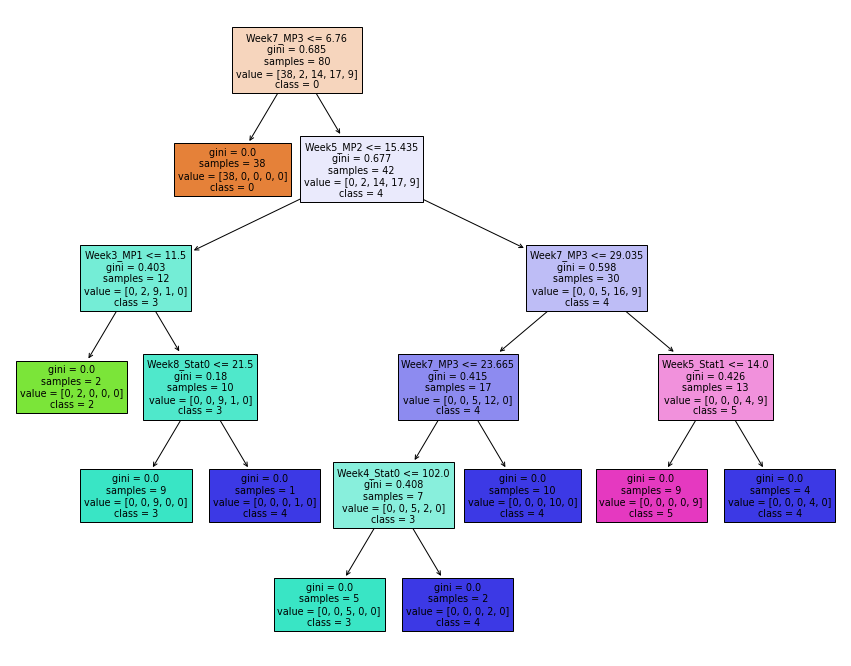

In [43]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X_train.columns),  
                   class_names=["0","2","3","4","5"],
                   filled=True)

## Why Random Forest is better than kNN?

Students grade data is high dimensional (45 dimensions) and has a small number of samples (107 samples).

kNN is effective when there is a large number of training samples but in this problem there is not much data. On the other hand, Random Forest can handle high dimensional spaces very well and can have good results even if the number of samples is not high.


## Why Decision Tree is the best model for this problem?

The reason why Decision Tree is the best model for this problem is that there are too many features and some of them are much important than the others. Since random forest selecting the features randomly, it uses the features with has very low importance. On the other hand, the decision tree chooses only the most important features and fits the data better and as a result has a higher accuracy than random forest.

# Part 4 – Performance Evaluation

Random Forest could be generated any number of trees, to decided how many trees should be used the model has been developed again and again with different number of trees. It is seen that the best result is with 15 trees, and using less then 10 trees could cause a low accuracy.

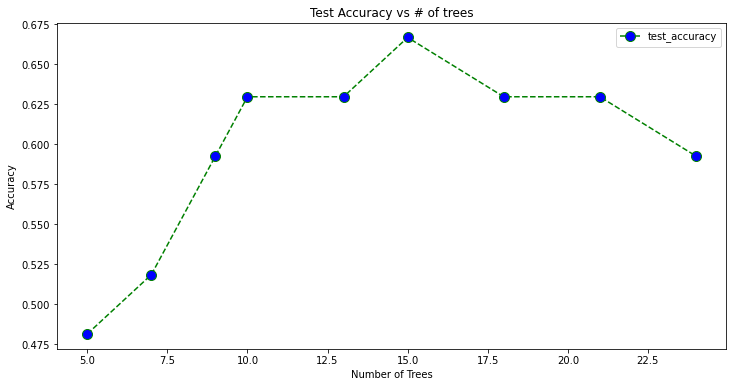

In [96]:
from sklearn.metrics import accuracy_score

accuracy_list_test=[]

n_estimators=[5,7,9,10,13,15,18,21,24]

for n in n_estimators:
  new_model = RandomForestClassifier(n_estimators=n,n_jobs=2, random_state=0)
  new_model.fit(X_train, y_train)
  predicted_values_test=new_model.predict(X_test)
  accuracy_list_test.append(accuracy_score(y_test, predicted_values_test))

plt.figure(figsize=(12, 6))  
plt.plot(n_estimators, accuracy_list_test, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10, label="test_accuracy")
plt.title('Test Accuracy vs # of trees')  
plt.xlabel('Number of Trees')  
plt.ylabel('Accuracy') 
plt.legend(loc="upper right")
plt.show()

Another study has done for k-NN algorithm and for its number of neighbors. Using 1 or 3 neighbors leads to around 0.6 accuracy and using 5 or more is leading around 0.52 accuracy.

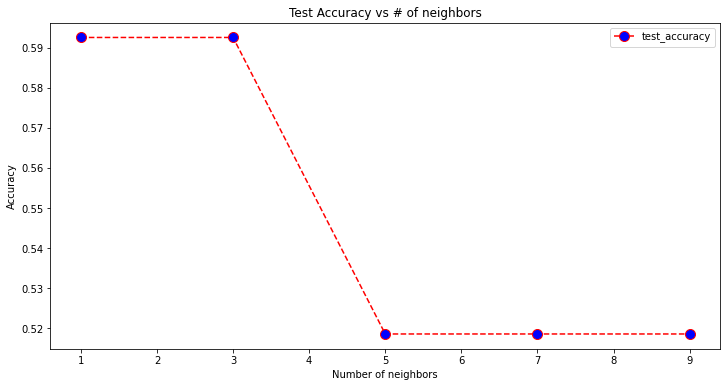

In [111]:
accuracy_list_test=[]

neighbors_=[1,3,5,7,9]

for n in neighbors_:
  new_model = neighbors.KNeighborsClassifier(n_neighbors=n)
  new_model.fit(X_train, y_train)
  predicted_values_test=new_model.predict(X_test)
  accuracy_list_test.append(accuracy_score(y_test, predicted_values_test))

plt.figure(figsize=(12, 6))  
plt.plot(neighbors_, accuracy_list_test, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10, label="test_accuracy")
plt.title('Test Accuracy vs # of neighbors')  
plt.xlabel('Number of neighbors')  
plt.ylabel('Accuracy') 
plt.legend(loc="upper right")
plt.show()

#Part 5 – Important features

In [66]:
from matplotlib import pyplot

# get importance
importance = RF_model.feature_importances_

#to be ploted
feature_importance = []

# summarize feature importance
for i in range(len(importance)):
	feature_importance.append((list(X_train.columns)[i],importance[i]))
 
feature_importance

[('Week2_Quiz1', 0.0),
 ('Week3_MP1', 0.0770425141379433),
 ('Week3_PR1', 0.0),
 ('Week5_MP2', 0.15932919818853364),
 ('Week5_PR2', 0.00440973817179605),
 ('Week7_MP3', 0.16502775982680107),
 ('Week7_PR3', 0.0),
 ('Week4_Quiz2', 0.020768143539311147),
 ('Week6_Quiz3', 0.00775519529917935),
 ('Week1_Stat0', 0.024194893473160527),
 ('Week1_Stat2', 0.0029640436038602023),
 ('Week1_Stat3', 0.006043752535377709),
 ('Week2_Stat0', 0.03021262550292352),
 ('Week2_Stat1', 0.008883287783917428),
 ('Week2_Stat2', 0.005817561601032485),
 ('Week2_Stat3', 0.005723312819503579),
 ('Week3_Stat0', 0.02884193265594347),
 ('Week3_Stat1', 0.0),
 ('Week3_Stat2', 0.01280001763177054),
 ('Week3_Stat3', 0.01565600964924203),
 ('Week4_Stat0', 0.09567472166813415),
 ('Week4_Stat1', 0.0),
 ('Week4_Stat2', 0.004641909814323608),
 ('Week4_Stat3', 0.013383431973598443),
 ('Week5_Stat0', 0.010686406366571973),
 ('Week5_Stat1', 0.058192225913940354),
 ('Week5_Stat2', 0.01897183020292485),
 ('Week5_Stat3', 0.006802163

In [67]:
#only the features which importance value is higher than 0.04
feature_importance_tops = []
for i in range(len(importance)):
  if importance[i] > 0.04:
	  feature_importance_tops.append((list(X_train.columns)[i],importance[i]))
 
feature_importance_tops

[('Week3_MP1', 0.0770425141379433),
 ('Week5_MP2', 0.15932919818853364),
 ('Week7_MP3', 0.16502775982680107),
 ('Week4_Stat0', 0.09567472166813415),
 ('Week5_Stat1', 0.058192225913940354),
 ('Week6_Stat1', 0.04572731310633148),
 ('Week7_Stat0', 0.04693550212205027)]

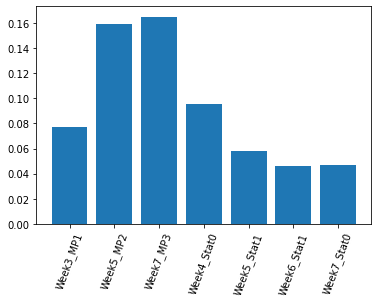

In [68]:
# plot feature importance
plt.bar(range(len(feature_importance_tops)), [val[1] for val in feature_importance_tops], align='center')
plt.xticks(range(len(feature_importance_tops)), [val[0] for val in feature_importance_tops])
plt.xticks(rotation=70)
plt.show()

The most important three features are Week7_MP3, Week5_MP2 and Week4_Stat0. It was expected since Mini Project 2 and Mini Project 3 are the assignments with the highest effect on total grade.